# Handling cortical masks

Not every vertex on surface belongs to the cerebral cortex.
There are approximately 8.5% of vertices around the medial wall that are non-cortical.
When analyzing fMRI data on surface, we usually want to focus on vertices of the cerebral cortex and mask out non-cortical vertices.
This masking step changes the number of vertices and the shape of the data.

```{margin} Different surface spaces
If you use the cortical mask of the `fsaverage5` or `fsaverage6` surface instead of `fsaverage`, the number of cortical vertices would slightly differ.
```
For example, with the `icoorder5` resolution `fsaverage` surface there are 10242 vertices per hemisphere in total.
After masking out the non-cortical vertices, there are 9372 and 9370 vertices for the left and right hemispheres, respectively.

The `brain_plot` function automatically detects whether the data has been masked or not and render it accordingly.

```{glue:} cortical_masks
```

In [1]:
import numpy as np
from brainplotlib import brain_plot
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

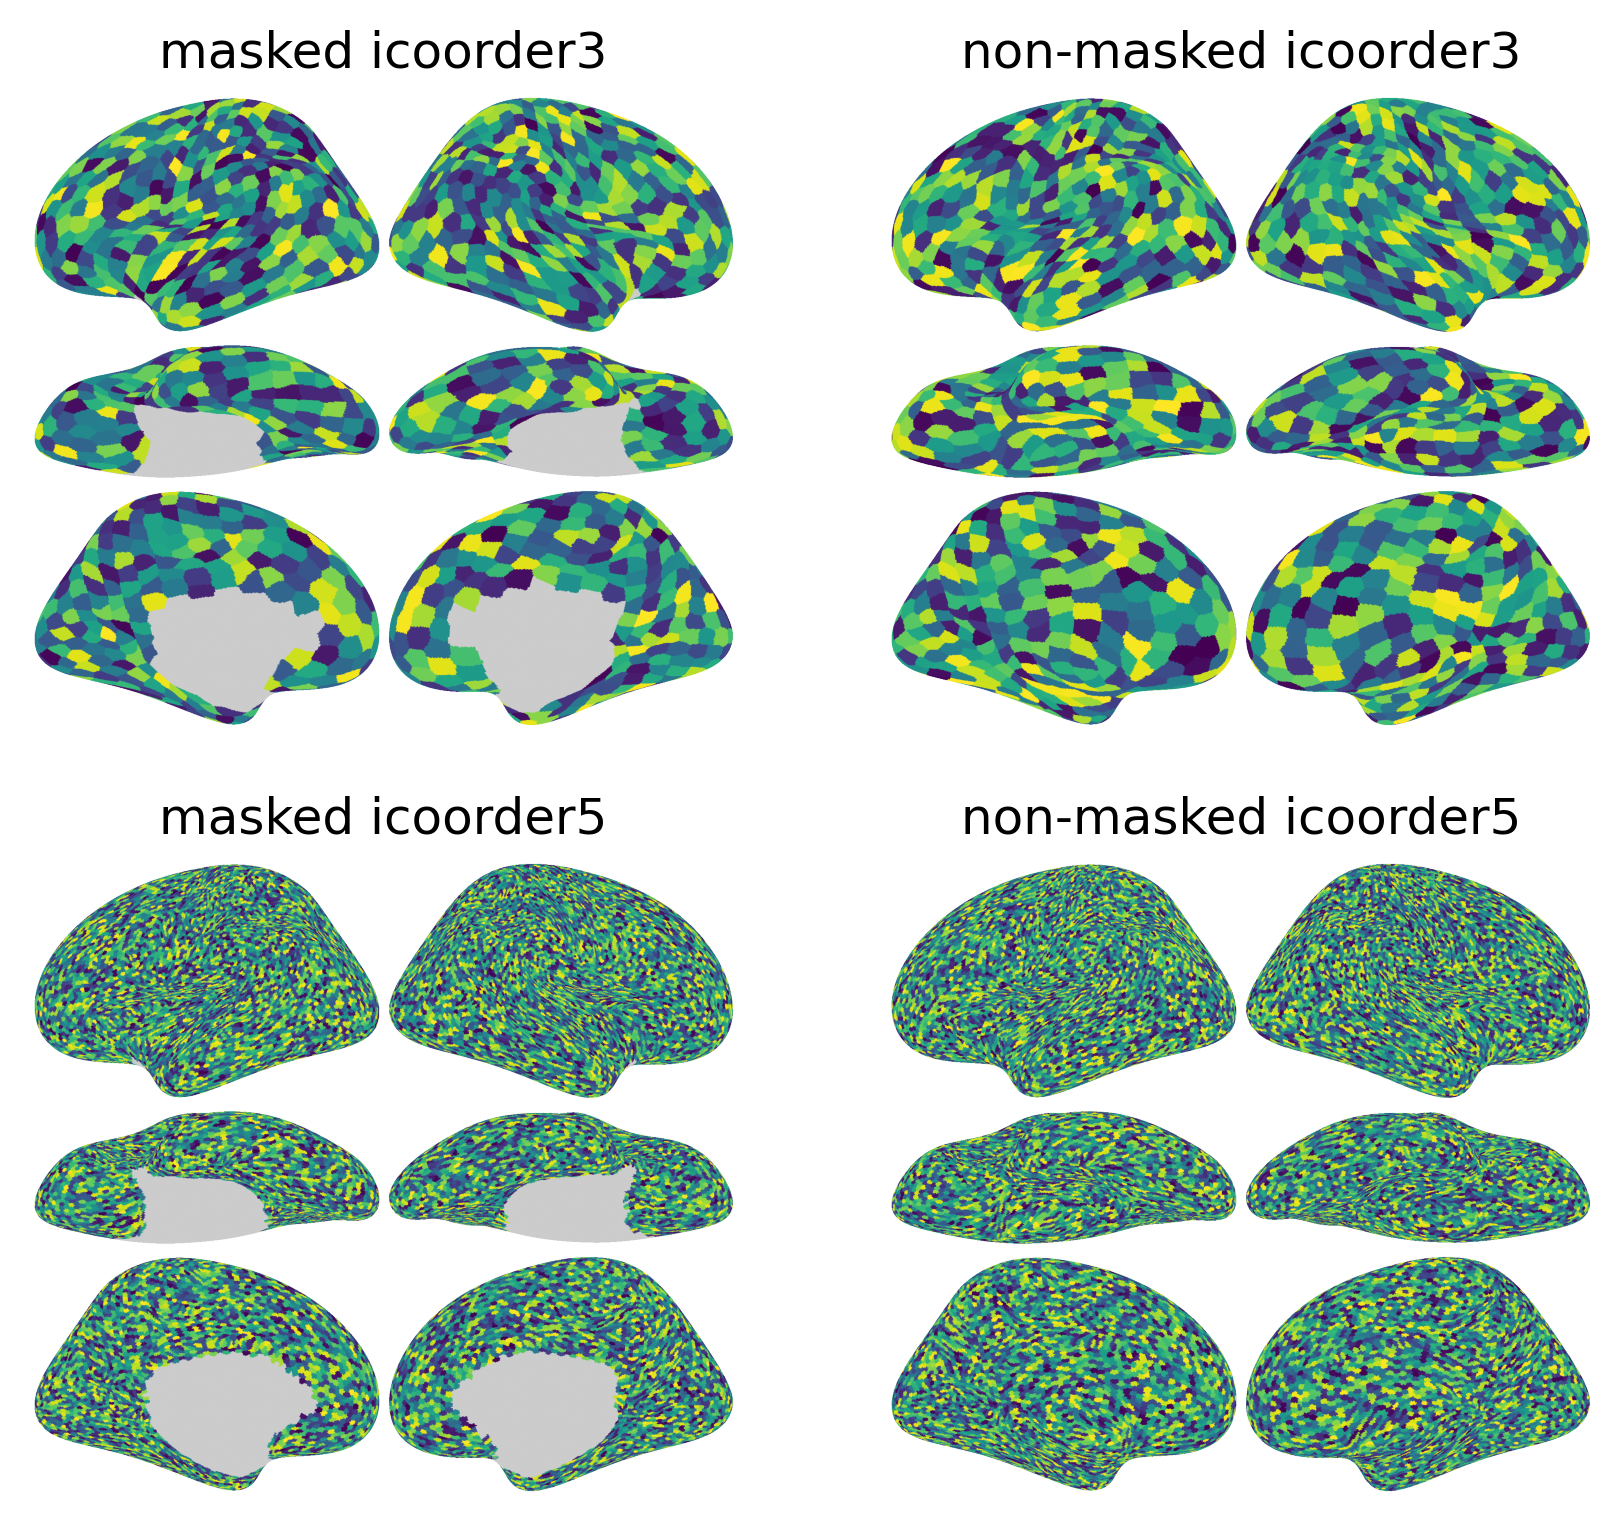

In [2]:
fig, axs = plt.subplots(2, 2, dpi=300, figsize=([_/300 + 1 for _ in [1728, 1560]]))
for i in range(2):
    for j in range(2):
        if (i, j) == (0, 0):
            v = rng.random((588 + 587, ))
            title = 'masked icoorder3'
        elif (i, j) == (0, 1):
            v = rng.random((642 * 2, ))
            title = 'non-masked icoorder3'
        elif (i, j) == (1, 0):
            v = rng.random((9372 + 9370, ))
            title = 'masked icoorder5'
        elif (i, j) == (1, 1):
            v = rng.random((10242 * 2, ))
            title = 'non-masked icoorder5'

        ax = axs[i][j]
        img = brain_plot(v, vmax=1, vmin=0)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(title)
plt.show()

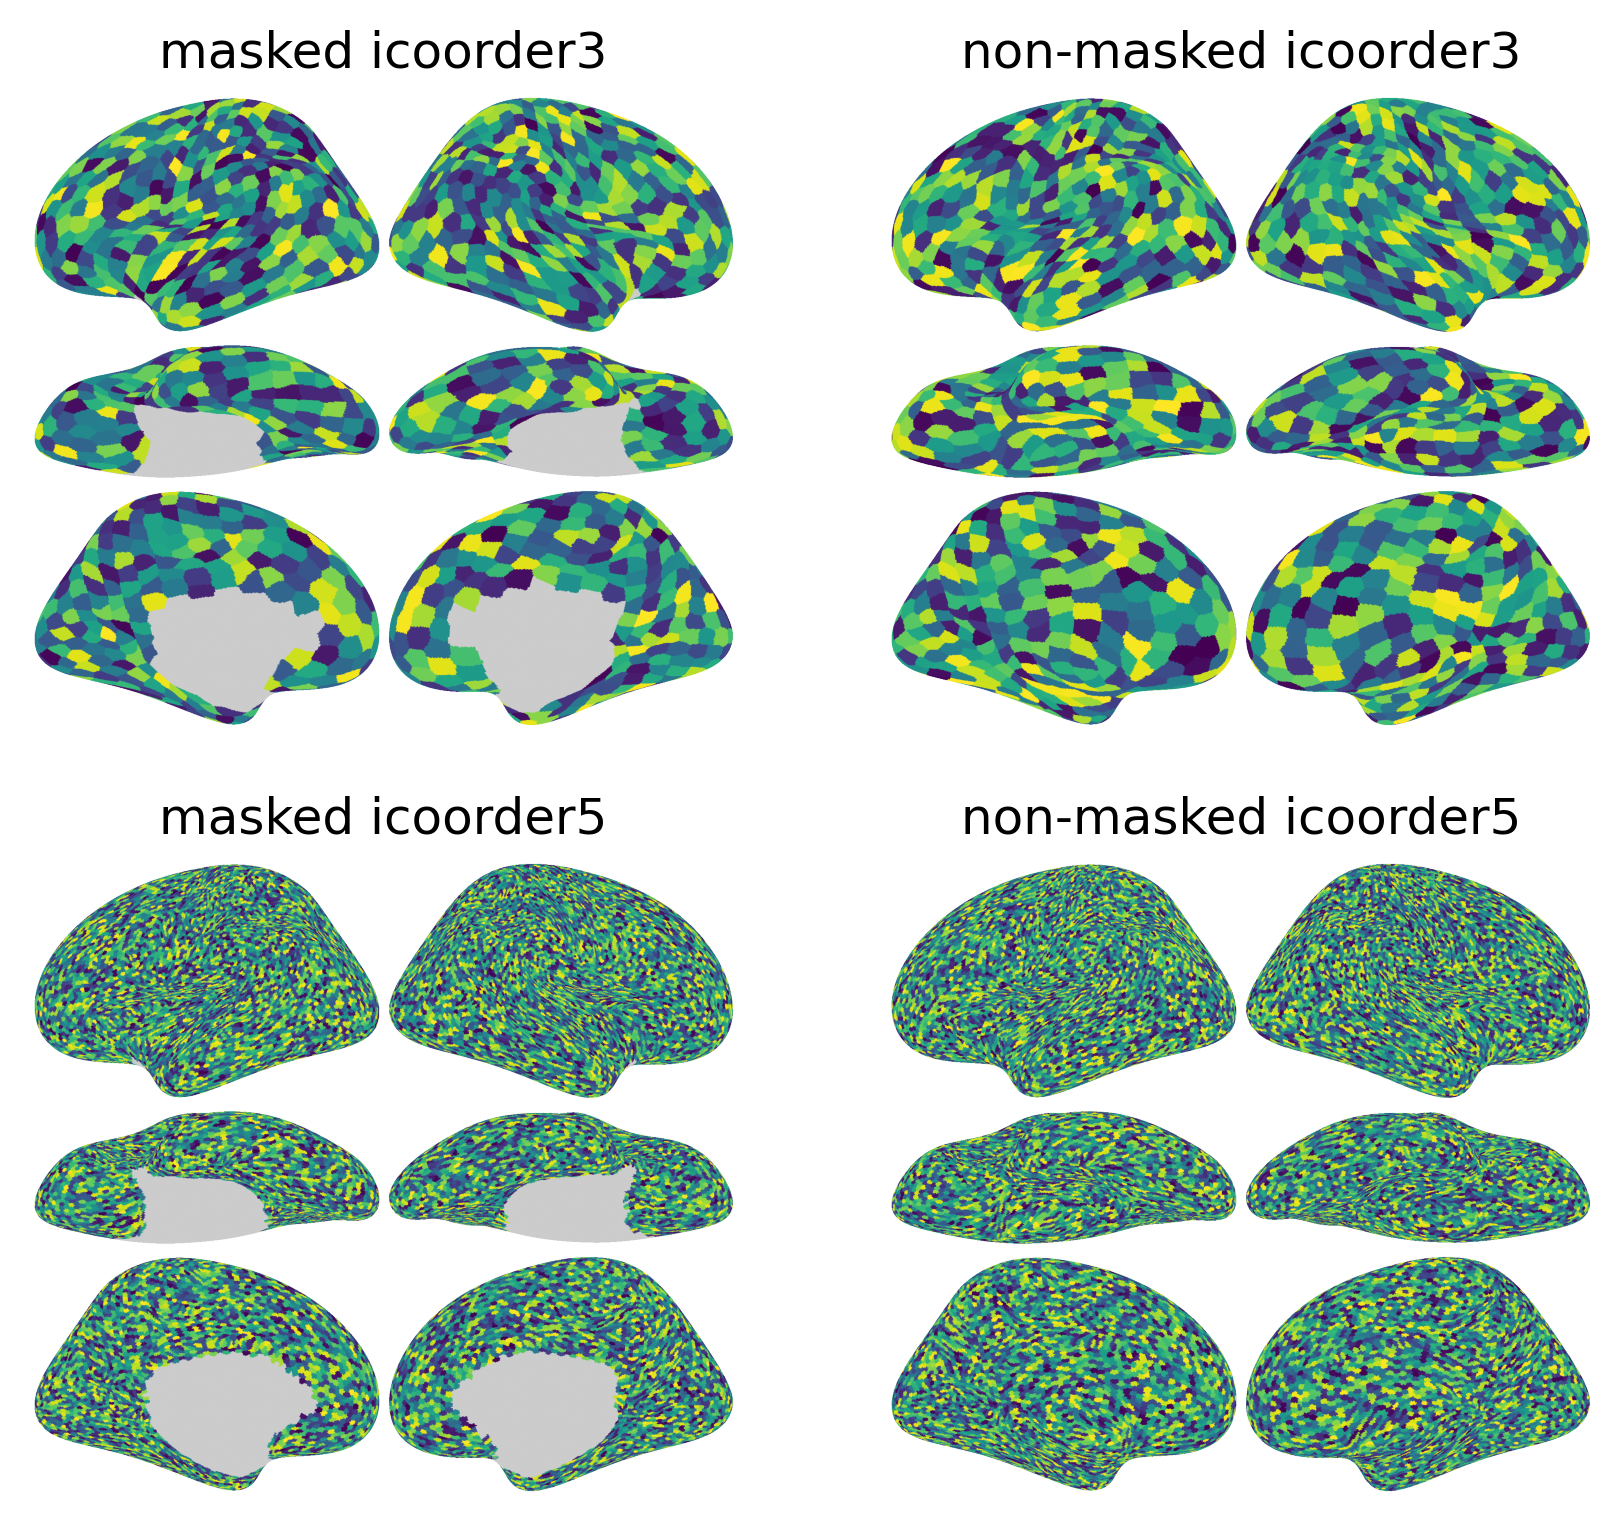

In [3]:
from myst_nb import glue
glue('cortical_masks', fig, display=False)

## Different forms of input

The `brain_plot` function also handles different forms of input. The values to be plotted on surface can be one of:
- Two NumPy arrays for the left and right hemispheres, respectively.
- A list or tuple of NumPy arrays with two elements.
- A concatenated NumPy array comprising data from both left and right hemispheres (left hemisphere first).

The same image can be generated using different forms of input, as long as the actual data is the same.

In [4]:
lh, rh = rng.random((588, )), rng.random((587, ))

img1 = brain_plot(lh, rh, vmax=1, vmin=0)
img2 = brain_plot([lh, rh], vmax=1, vmin=0)
img3 = brain_plot(np.concatenate([lh, rh], axis=0), vmax=1, vmin=0)

np.testing.assert_array_equal(img1, img2)
np.testing.assert_array_equal(img1, img3)

{{ gallery_link }}